## Use numpy for corr

In [3]:
import numpy as np

In [8]:
X=[12,13,10,9,20,7,4,22,15,23]
Y=[50,54,48,47,70,20,15,40,35,37]

In [5]:
c=np.cov(X,Y)  # returns a matrix

In [6]:
print c

[[  41.61111111   49.44444444]
 [  49.44444444  260.26666667]]


In [7]:
rho=np.corrcoef(X,Y) # correlation coeffiency


In [8]:
print rho

[[ 1.          0.47512028]
 [ 0.47512028  1.        ]]


In [9]:
rho2=np.correlate(X,Y)  #Dont use this

In [10]:
print rho2

[6061]


## Use pandas for corr.  

In [4]:
import pandas as pd

In [24]:
d=pd.DataFrame(X,Y)

In [25]:
d.corr(method='pearson')

,0
0,1.0


In [26]:
pd.DataFrame.corr(d)

,0
0,1.0


In [27]:
print(d.describe())

               0
count  10.000000
mean   13.500000
std     6.450667
min     4.000000
25%     9.250000
50%    12.500000
75%    18.750000
max    23.000000


Scatter plot

In [13]:
import matplotlib.pyplot as plt

In [29]:
plt.scatter(X,Y)

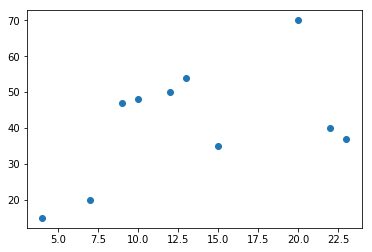

In [30]:
plt.show()

## Test of correlation

$$ t =  \frac {r-0} {\sqrt {\frac {1-r^2 } {n-2}}} $$

In [37]:
r=rho[0,1]

In [46]:
t=r/np.sqrt((1-r*r)/(len(X)-2))

In [47]:
t

1.5272317740109411

怎么查t分布表？df=8, 5%

In [6]:
import scipy as sc
from scipy.stats import t

In [14]:
np.random.seed(282629734)
x = sc.stats.t.rvs(len(X)-2, size=1000)

In [15]:
m, v, s, k = sc.stats.t.stats(len(X)-2, moments='mvsk')

In [16]:
print('t-statistic = %6.3f pvalue = %6.4f' %  sc.stats.ttest_1samp(x,m))

t-statistic =  0.160 pvalue = 0.8726


In [17]:
fig, ax = plt.subplots(1, 1)

In [18]:
df=len(X)-2
mean, var, skew, kurt = t.stats(df, moments='mvsk')

In [19]:
x = np.linspace(t.ppf(0.01, df),
...                 t.ppf(0.99, df), 100)

In [20]:
ax.plot(x, t.pdf(x, df),
...        'r-', lw=5, alpha=0.6, label='t pdf')

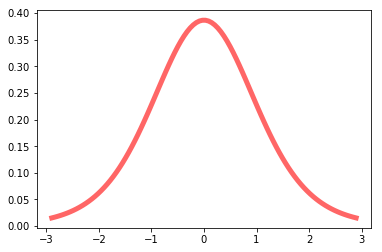

In [21]:
plt.show()